# Overview

I’m using Python to connect to Google Trends API using Pytrends, iterate the data collection over the list of keywords and integrate them using a keyword as reference. We need to do so because Google Trends only allow maximum of 5 keywords comparison at a time.

## Import Packges

In [1]:
# API set up and essential packages
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)

## Pytrends Input, Data Extraction, Transformation, Load Output

In [2]:
colnames = ["keywords"]
df = pd.read_csv("rsh_top_keywords_input.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-01 2021-07-29',
     geo='GB')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('rsh_top_keywords_output.csv')

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Execution time in sec.: 73.57501816749573


## Pytrends Output Data Import

In [8]:
trend_df = pd.read_csv('rsh_top_keywords_output.csv')
x = trend_df.copy()
data = trend_df.set_index(['date'])
trend_df.head(10)

,date,abrasives,blue loctite,loctite,loctite 243,loctite 290,loctite adhesive,loctite thread,loctite threadlocker,loctite threadlocker blue,threadlocker,threadlocker blue
0,7/5/20,11,0,65,46,0,0,29,0,0,43,46
1,7/12/20,23,24,77,48,89,21,0,87,0,23,0
2,7/19/20,12,74,91,49,0,0,30,59,0,0,0
3,7/26/20,24,0,93,51,0,22,0,0,0,47,100
4,8/2/20,0,25,67,99,0,43,0,30,0,93,49
5,8/9/20,35,0,84,24,0,0,30,29,0,23,48
6,8/16/20,35,0,51,0,0,0,91,0,0,46,49
7,8/23/20,81,73,79,25,0,21,91,29,0,23,48
8,8/30/20,36,0,66,26,0,45,0,31,0,48,0
9,9/6/20,83,100,86,0,0,44,62,60,51,70,50


## Data Visualization

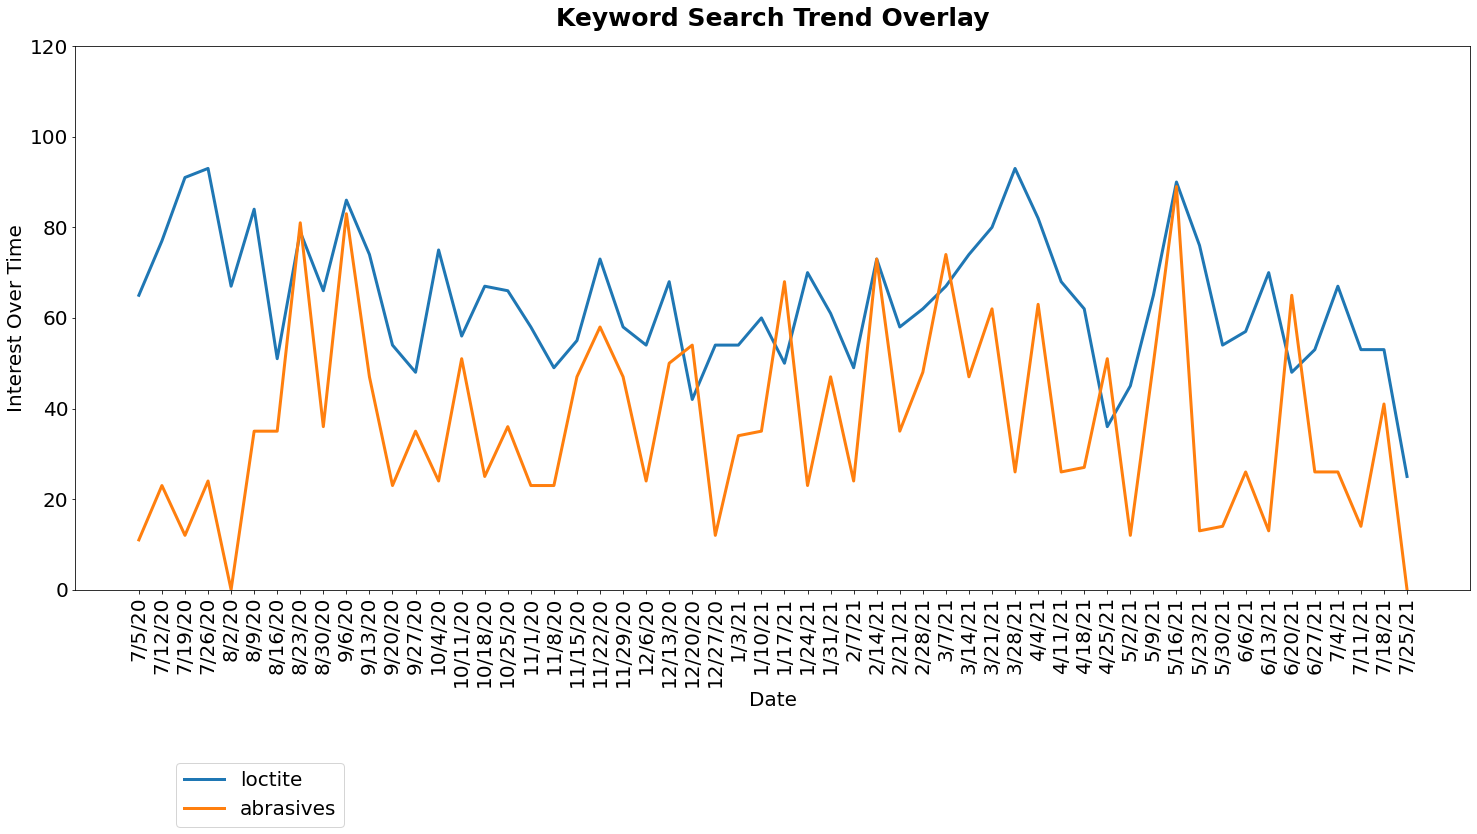

In [22]:
# define axis for keywrods with sufficient data points
x_axis = trend_df['date']
y1 = trend_df['blue loctite']
y2 = trend_df['loctite']
y3 = trend_df['loctite 243']
y4 = trend_df['loctite 290']
y5 = trend_df['loctite adhesive']
y6 = trend_df['loctite thread']
y7 = trend_df['loctite threadlocker']
y8 = trend_df['loctite threadlocker blue']
y9 = trend_df['threadlocker']
y10 = trend_df['threadlocker blue']
y11 = trend_df['abrasives']



# initiate the plot
#plt.plot(x_axis, y1, label = 'blue loctite', linewidth=3)
plt.plot(x_axis, y2, label = 'loctite', linewidth=3)
#plt.plot(x_axis, y3, label = 'loctite 243', linewidth=3)
#plt.plot(x_axis, y4, label = 'loctite 290', linewidth=3)
#plt.plot(x_axis, y5, label = 'loctite adhesive', linewidth=3)
#plt.plot(x_axis, y6, label = 'loctite thread', linewidth=3)
#plt.plot(x_axis, y7, label = 'loctite threadlocker', linewidth=3)
#plt.plot(x_axis, y8, label = 'loctite threadlocker blue', linewidth=3)
#plt.plot(x_axis, y9, label = 'threadlocker', linewidth=3)
#plt.plot(x_axis, y10, label = 'threadlocker blue', linewidth=3)
plt.plot(x_axis, y11, label = 'abrasives', linewidth=3)


# plot legend, labels, parameters
plt.legend(fontsize=20, bbox_to_anchor=(0.2, -0.3))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Interest Over Time', fontsize=20)
plt.ylim(0, 120)
plt.title('Keyword Search Trend Overlay', fontsize=25, fontweight='bold', pad=20)
plt.xticks(x_axis, rotation =90, fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = [25,10]

plt.savefig("Keyword Search Trend Overlay", dpi=400, bbox_inches="tight")
plt.show()

### Note: the same thing can be done for competitor analysis as well. Anything Google Trends has to offer we can easily extract for keywords bulk analysis and tracking.